# Hyperparameter Tuning For classification dataset 


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# Import dataset 
dataset=pd.read_excel(r"C:\Users\ASUS\OneDrive\Desktop\Data Sets\Placed or not.xlsx")
dataset.head()

,CGPA,TestScore,Placed
0,8.5,82,1
1,7.2,65,1
2,6.8,58,0
3,9.1,91,1
4,5.9,45,0


# Checking Outliers 

<Axes: >

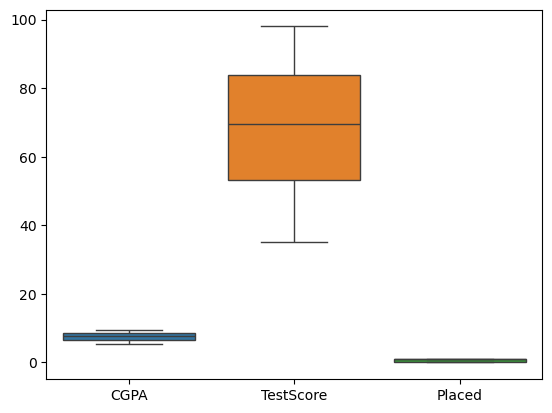

In [63]:
sns.boxplot(dataset)

In [3]:
dataset.info()
# No null values all are in integer or float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CGPA       102 non-null    float64
 1   TestScore  102 non-null    int64  
 2   Placed     102 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [4]:
dataset.describe()

,CGPA,TestScore,Placed
count,102.000000,102.000000,102.000000
mean,7.566667,68.431373,0.666667
std,1.230096,18.059039,0.473732
min,5.400000,35.000000,0.000000
25%,6.525000,53.250000,0.000000
50%,7.600000,69.500000,1.000000
75%,8.675000,83.750000,1.000000
max,9.600000,98.000000,1.000000


In [5]:
# Split data set into input and output 
x=dataset.iloc[:,:-1]
y=dataset["Placed"]

In [6]:
# Split the dataset into train test split 
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<Axes: xlabel='CGPA', ylabel='TestScore'>

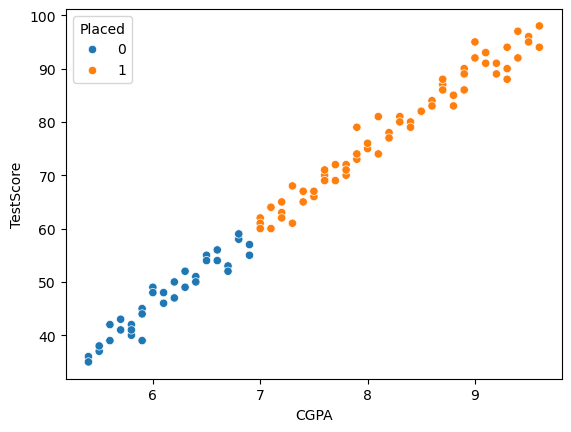

In [8]:
# Plot the scatter plot od the datsaset 
sns.scatterplot(x=dataset["CGPA"],y=dataset["TestScore"],hue=dataset["Placed"])

# Support Vector Machine 

In [67]:
# I think in this dataset Linear regression works better 
from sklearn.svm import SVC

In [69]:
sc=SVC()

In [71]:
sc.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [73]:
sc.score(x_test,y_test)*100

95.23809523809523

In [75]:
sc.score(x_train,y_train)*100

98.76543209876543

In [77]:
from mlxtend.plotting import plot_decision_regions

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

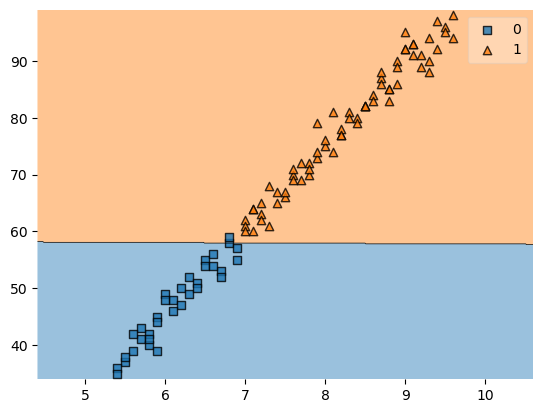

In [79]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=sc)

# Hyper Parameter Tuning

In [33]:
# Now to increase the accuracy we do Hyperparametric tuning 
# Their are two types of Hyper parameter Tuning 1) Grid Search CV 
# 2) Random Search CV


In [35]:
# Import Grid Seacrch and Random search CV 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [37]:
x1={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto'],
    "decision_function_shape":['ovo', 'ovr']}

In [39]:
gd=GridSearchCV(SVC(),param_grid=x1)

In [41]:
gd.fit(x_train,y_train)

,estimator,SVC()
,param_grid,"{'decision_function_shape': ['ovo', 'ovr'], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.0


In [42]:
gd.best_params_

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}

In [43]:
gd.best_score_

1.0

# SVC after Hyper parameter Tuning 

In [81]:
# I think in this dataset Linear regression works better 
from sklearn.svm import SVC

In [83]:
sc1=SVC(decision_function_shape='ovo', gamma= 'scale', kernel= 'linear')

In [85]:
sc1.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [87]:
sc1.score(x_test,y_test)*100

100.0

In [89]:
sc1.score(x_train,y_train)*100

100.0

# Plot decision Region 

In [92]:
# Plot decision region
from mlxtend.plotting import plot_decision_regions

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 0.98, 'Hyper_Parameter_Tuning')

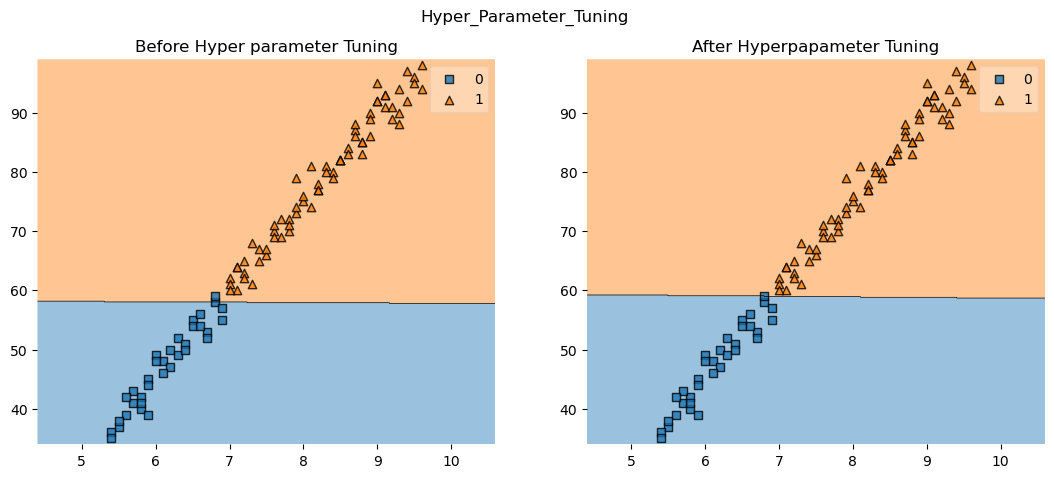

In [123]:
fig,axes=plt.subplots(1,2,figsize=(13,5))
axes[0].set_title("Before Hyper parameter Tuning")
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=sc,ax=axes[0])
axes[1].set_title("After Hyperpapameter Tuning")
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=sc1,ax=axes[1])
plt.suptitle("Hyper_Parameter_Tuning")